<center> <h1> "Принятие решений в бизнесе на основе данных"</h1> </center>
    
   <center> <h1> Самостоятельный проект</h1> </center>


### Описание данных

**Данные для первой части**

Файл `/datasets/hypothesis.csv`

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

**Данные для второй части**

Файл `/datasets/orders.csv`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, math as mt, seaborn as sns, datetime as dt
import scipy.stats as stats
pd.set_option('display.max_columns', None)

In [2]:
df_hypothesis=pd.read_csv('/datasets/hypothesis.csv')

In [3]:
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Для удобства использования, приведём названия столбцов таблицы к нижнему регистру.

In [4]:
df_hypothesis.columns=df_hypothesis.columns.str.lower()

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
df_hypothesis['ICE']=(df_hypothesis['impact']*df_hypothesis['confidence'])/df_hypothesis['efforts']
df_hypothesis_ice=df_hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
df_hypothesis_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Аналогичную задачу выполним, используя фреймворк RICE

In [6]:
df_hypothesis['RICE']=(df_hypothesis['reach']*df_hypothesis['impact']*df_hypothesis['confidence'])/df_hypothesis['efforts']
df_hypothesis_rice=df_hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
df_hypothesis_rice

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


## Вывод
Методы ICE и RICE дают совершенно разные результаты расчёта приоритета гипотез. Такое различие вызвано тем, что метод ICE не учитывает охват пользователей, которых затронет изменение. Так как значения параметра REACH известны, то полагаться необходимо на результаты приоритизации методом RICE.



### Часть 2. Анализ A/B-теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Выполним небольшие преобразования для удобства использования

In [10]:
orders['date']=pd.to_datetime(orders['date'])
orders.columns=['orderId', 'userId', 'date', 'revenue', 'group']

In [11]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведём данные столбца date к нужному типу

In [13]:
visitors['date']=pd.to_datetime(visitors['date'])

Расчитаем необходимые данные для оценки

In [14]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [15]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max',
                                                                       'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [16]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [17]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [18]:
ordersADaily = orders[orders['group']=='A'][['date',
                                             'orderId',
                                             'userId',
                                             'revenue']].groupby('date',
                                                                 as_index=False).agg(
    {'orderId': pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [19]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [20]:
ordersBDaily = orders[orders['group']=='B'][['date',
                                             'orderId',
                                             'userId',
                                             'revenue']].groupby(
    'date', as_index=False).agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [21]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Сформируем общую таблицу, объединив всю информацию относительно каждого дня.

In [22]:
data = ordersADaily.merge(ordersBDaily,
                          left_on='date',
                          right_on='date',
                          how='left').merge(ordersACummulative,
                                            left_on='date',
                                            right_on='date',
                                            how='left').merge(
    ordersBCummulative, left_on='date', right_on='date', how='left').merge(
    visitorsADaily, left_on='date', right_on='date', how='left').merge(
    visitorsBDaily, left_on='date', right_on='date', how='left').merge(
    visitorsACummulative, left_on='date', right_on='date', how='left').merge(
    visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Построим графики кумулятивной выручки по группам.

In [23]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[
    np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'orderId' : pd.Series.nunique,
'userId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[
    np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
cummulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


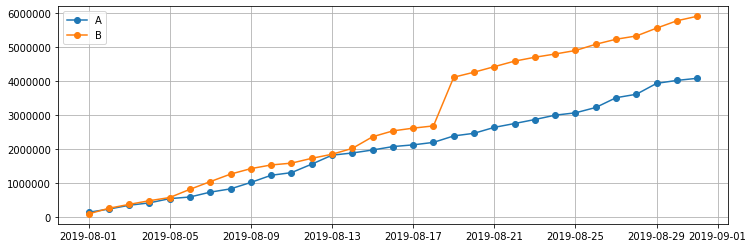

In [26]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A', marker='o')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B', marker='o')
plt.legend()

По обеим группам выручка стабильно увеличивается.Группа В в целом немного лучше группы А. В группе В наблюдается резкий скачок вверх между 17-ым и 21-ым августа. Мешают аномально большие заказы.



Оценим графики кумулятивных средних чеков по группам. 

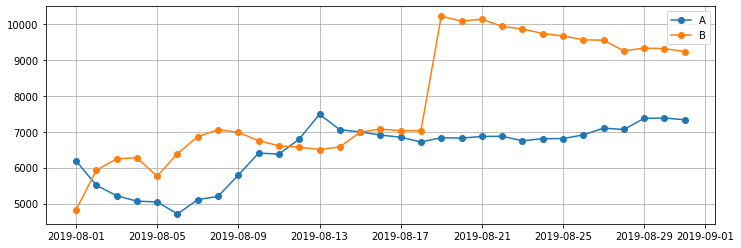

In [27]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A', marker='o')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B', marker='o')
plt.legend()

Значение среднего чека стабилизируется после половины продолжительности эксперимента. Причём после резкого скачка в группе В значение среднего чека уменьшается, а в группе А продолжает расти.



Построим график относительного различия для среднего чека.

In [28]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(
    cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

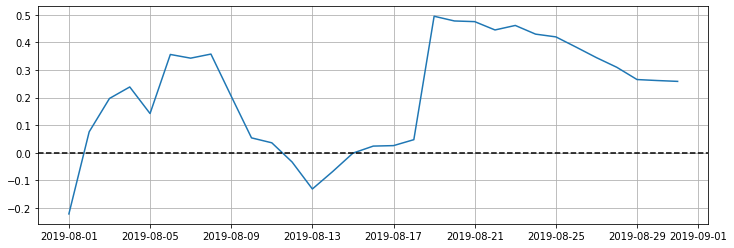

In [29]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(mergedCummulativeRevenue['date'], (
    mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(
    mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='dashed')


График сильно колеблется, что свидетельствует о наличии аномальных данных.



Построим графики кумулятивной конверсии по группам

In [30]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

[Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'), 0, 0.04]

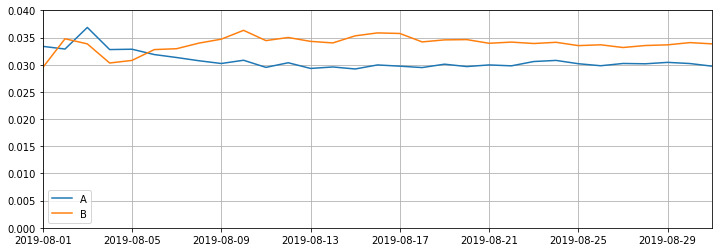

In [31]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([cummulativeDataA['date'].min(), cummulativeDataA['date'].max(), 0, 0.04])


После 5-ого августа конверсия группы В растёт, а группы А падает. После 9-ого августа и до конца теста конверсия тестовой группы стабильно выше, чем контрольной.



Оценим график относительного различия кумулятивных конверсий.

In [32]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

[Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'), -0.5, 0.4]

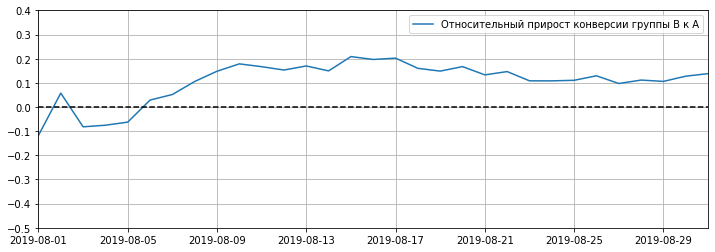

In [33]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions[
    'conversionB']/mergedCummulativeConversions[
    'conversionA']-1, label="Относительный прирост конверсии группы B к A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([mergedCummulativeConversions['date'].min(), mergedCummulativeConversions['date'].max(), -0.5, 0.4])

Относительный прирост конверсии группы В к группе А после 5-ого августа вышел в плюс, вырос и до окончания теста оставался положительным и относительно стабильным.



Оценим конверсию по группам.

In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby(
    'userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [35]:
ordersByUsersB = orders[orders['group']=='B'].groupby(
    'userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data[
    'visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00840
0.138


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления аномалий.



In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[
    orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. При том,что относительное различие среднего чека между существенное 25,9%
Приступим к анализу аномалий.



#### Анализ выбросов и всплесков. Очистка данных от аномалий.

In [38]:
print('Максимальная выручка заказа ', orders['revenue'].max(),' руб.')
print('Минимальная выручка заказа всего', orders['revenue'].min(),' руб.')
print('Отличие между максимальной и минимальной выручкой заказа',
      orders['revenue'].max()/orders['revenue'].min(), ' раз!')


Максимальная выручка заказа  1294500  руб.
Минимальная выручка заказа всего 50  руб.
Отличие между максимальной и минимальной выручкой заказа 25890.0  раз!


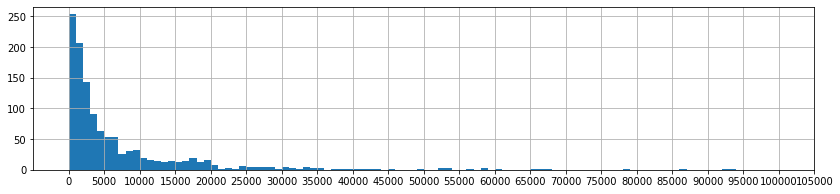

In [39]:
plt.xticks(range(0,orders['revenue'].max(), 5000))
orders['revenue'].hist(bins=100,figsize=(14,3), range=(0,100000))

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame(orders['revenue'].describe())

Оценим другой вид графика

Text(442.52, 1294500, 'Чтоб я так жил!')

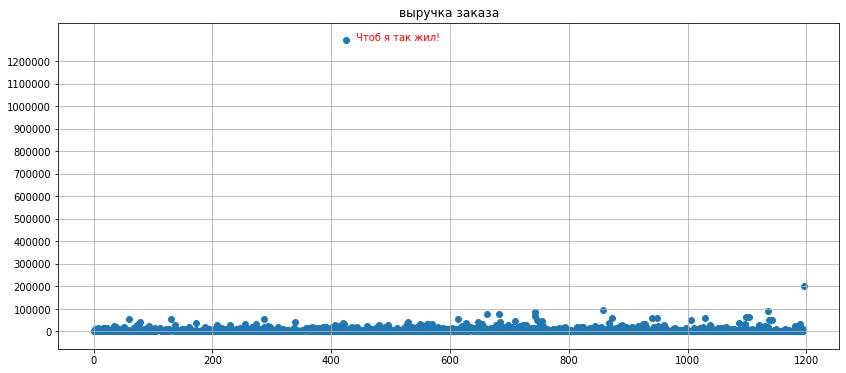

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14,6))
plt.grid()
plt.title('выручка заказа')
plt.yticks(np.arange(0, orders['revenue'].max(), 100000))
plt.scatter(x=x_values, y=orders['revenue'])
plt.text(x = 0.37*x_values.max(), y = orders['revenue'].max(), s = 'Чтоб я так жил!', c='r')

Значение в 1294500 портит картину и искажает восприятие. Ограничим диапазон значений до 220000, так, чтобы отсечь самый большой выброс, но сохранить второй по величине для наглядности, а также нанесём значения, соответствующие 90-му, 95-ому и 99-ому процентилям.



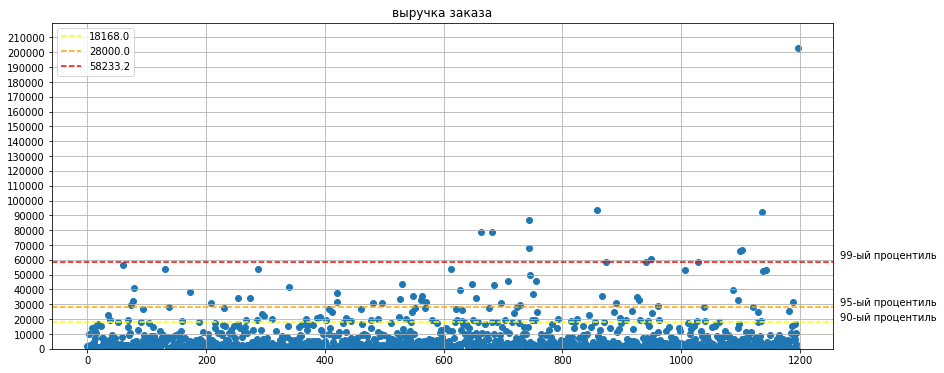

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14,6))
plt.grid()
plt.title('выручка заказа')
plt.ylim(0,220000)
percents=[90, 95, 99]
colors=['yellow','orange', 'red']

for el,c, percent in zip(np.percentile(orders['revenue'], percents), colors, percents):
    plt.axhline(y=el, color=c,linestyle='dashed')
    plt.text(x = 1.06*x_values.max(), y = 1.05 * el, s = str(percent)+'-ый процентиль')
    
   
plt.yticks(np.arange(0, 220000, 10000))
plt.scatter(x=x_values, y=orders['revenue'])
plt.legend(np.round(np.percentile(orders['revenue'], percents),3))

Не более 5 % заказов на сумму свыше 28000.

одсчитаем количество заказов по пользователям и посмотрим на результат:

In [42]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали  8, 9 и даже 11 заказов за месяц!

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

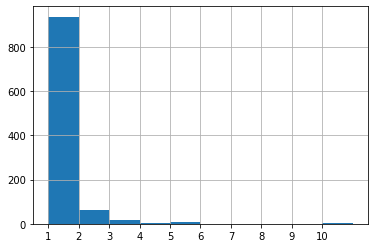

In [43]:
plt.xticks(range(0,ordersByUsers['orders'].max(), 1))
plt.grid()
plt.hist(ordersByUsers['orders'])


Большинство пользователей совершают 1 заказ, однако количество тех, кто делает 2 или 3 заказа также существенно.
Взглянем на точечную диаграмму числа заказов на одного пользователя.

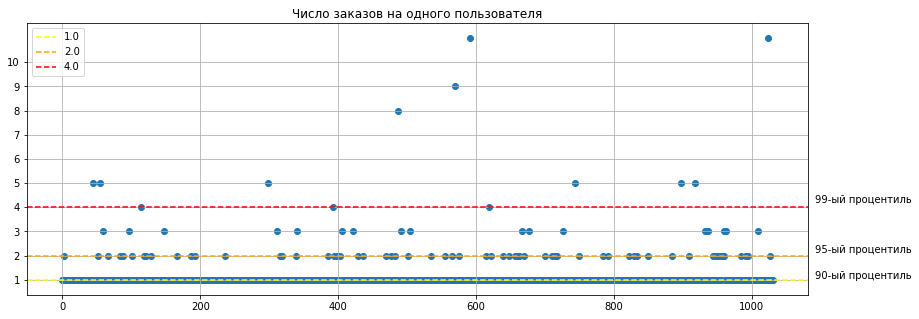

In [44]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.figure(figsize=(14,5))
plt.grid()
plt.title('Число заказов на одного пользователя')
percents=[90, 95, 99]
colors=['yellow','orange', 'red']

for el,c, percent in zip(np.percentile(ordersByUsers['orders'], percents), colors, percents):
    plt.axhline(y=el, color=c,linestyle='dashed')
    plt.text(x = 1.06*x_values.max(), y = 1.05 * el, s = str(percent)+'-ый процентиль')
    
   
plt.yticks(np.arange(0, ordersByUsers['orders'].max(), 1))
plt.scatter(x=x_values, y=ordersByUsers['orders'])
plt.legend(np.round(np.percentile(ordersByUsers['orders'], percents),3))

На графике видно, что пользователей с тремя заказами так же много. Свыше трёх заказов картина становится хаотичной. Целесообразно аномальными признать пользователей, совершивших более трёх заказов за месяц.

In [45]:
group_a=np.unique(list(orders.query('group=="A"')['userId']))
group_b=np.unique(list(orders.query('group=="B"')['userId']))

In [46]:
ab_list=[]
for el in group_a:
    if el in group_b:
        ab_list.append(el)
print(len(ab_list), 'пользователей одновременно присутствуют в обеих группах.')        

58 пользователей одновременно присутствуют в обеих группах.


Так-как на группы разделены именно заказы, а не пользователи, то исключать таких пользователей нет необходимости.
Сформируем списки аномальных пользователей, совешивших слишком много заказов и слишком дорогие заказы.

Сформируем списки с аномальными пользователями, для последующего исключения

In [47]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[
        ordersByUsersB['orders'] > 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: userId, dtype: int64

Создадим срезы без аномальных пользователей и посчитаем p-value для сравнения конверсии между очищенными группами. 

In [48]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.5f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00897
0.14846


После очистки прирост конверсии группы В относительно группы А увеличился на 1% и составил 14,8%. Статистическая значимость, как и в случае с "сырыми" данными имеется.



In [49]:
print("{0:.5f}".format(
    stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['userId'].isin(
        abnormalUsers)))]['revenue'],orders[
        np.logical_and(orders['group']=='B',np.logical_not(
            orders['userId'].isin(abnormalUsers)))]['revenue'])[1]))
print("{0:.5f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['userId'].isin(
        abnormalUsers)))]['revenue'].mean()/orders[
        np.logical_and(orders['group']=='A',np.logical_not(
            orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.48826
-0.01679


После очистки от аномальных данных различие в значении среднего чека поменяло знак. Теперь получилось, что средний чек группы А больше почти на 1,7%. Однако, этот результат не имеет статистической значимости. 



## Вывод
По итогам анализа проведённого теста можно заключить следующее:
1. При анализе "сырых" данных:
    * в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%;
    * статистически значимых отличий в среднем чеке между группами нет. При том,что относительное различие среднего чека между группами существенное 25,9%.
    
     
2. При анализе очищенных данных: 
    * прирост конверсии группы В относительно группы А увеличился на 1% и составил 14,8%. Статистическая значимость, как и в случае с "сырыми" данными имеется;
    * значение различия среднего чека поменяло знак. Средний чек группы А больше почти на 1,7%. Однако, этот результат не имеет статистической значимости.

В данном случае тест следует признать успешным и завершить, зафиксировав победу группы В, в следствие более высокой конверсии по сравнению с группой А.

